In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
%matplotlib inline

In [2]:
def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


In [3]:
idx = np.random.randint(600, size=100)
reduced_data = train_data[train_labels==0][idx]
reduced_labels = train_labels[train_labels==0][idx]
for i in range(1,10):
    reduced_data = np.vstack((reduced_data,train_data[train_labels==i][idx]))
    reduced_labels = np.concatenate((reduced_labels,train_labels[train_labels==i][idx]),axis=None)
print(reduced_data.shape)    
print(reduced_labels.shape)

(1000, 784)
(1000,)


In [4]:
pca = PCA(n_components=2, svd_solver='full')
pca_data = pca.fit_transform(reduced_data)
pca_data.shape

(1000, 2)

In [5]:
means = [np.mean(pca_data[reduced_labels==0],axis=0)]
for i in range(1,10):
    means.append(np.mean(pca_data[reduced_labels==i],axis=0))
means = np.array(means)
type(means)


numpy.ndarray

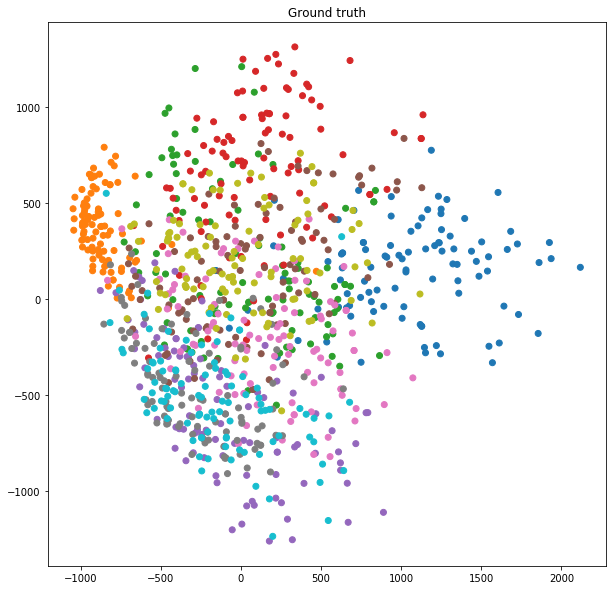

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(pca_data[:,0],pca_data[:,1],c=reduced_labels,cmap ='tab10' )
plt.title("Ground truth")
plt.show()

In [7]:
def kmns(data,labels,p):
    kmeans = KMeans(n_clusters=10, random_state=p).fit(data)
    predictions = kmeans.labels_
    predictions.shape
    plt.figure(figsize=(10,10))
    plt.scatter(pca_data[:,0],pca_data[:,1],c=predictions,cmap ='tab10' )
    plt.title("Predictions with initialization random state:"+str(p))
    plt.show()
    score1 = metrics.adjusted_rand_score(labels,predictions)
    print(score1)
    score2 = metrics.adjusted_mutual_info_score(labels,predictions)
    print(score2)
    score3 = metrics.v_measure_score(labels,predictions)
    print(score3)
    return [score1,score2,score3]
 

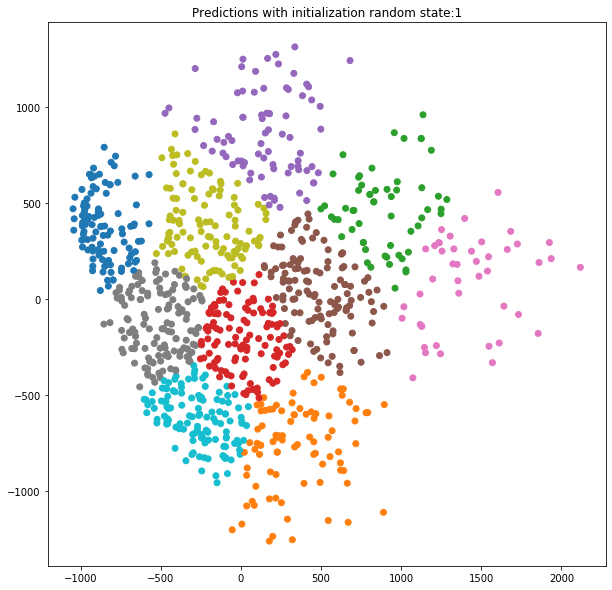

0.22085370712695593
0.35427229245666303
0.3696775512511231


/home/shashwat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


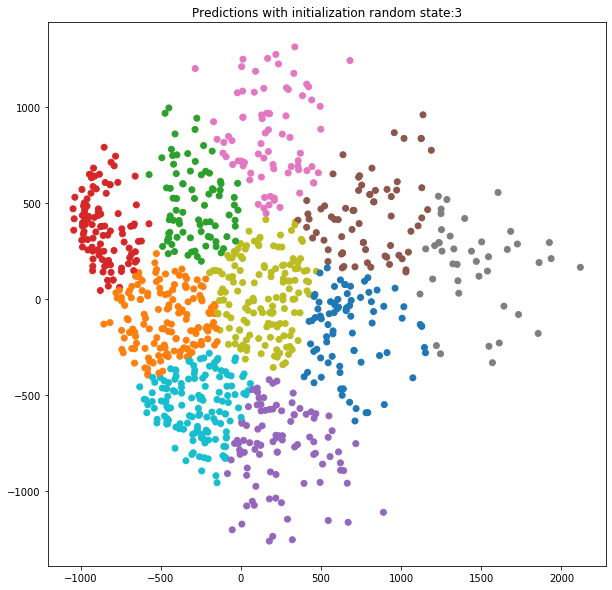

0.21534226122822295
0.3423696323481658
0.35937518259276896


/home/shashwat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


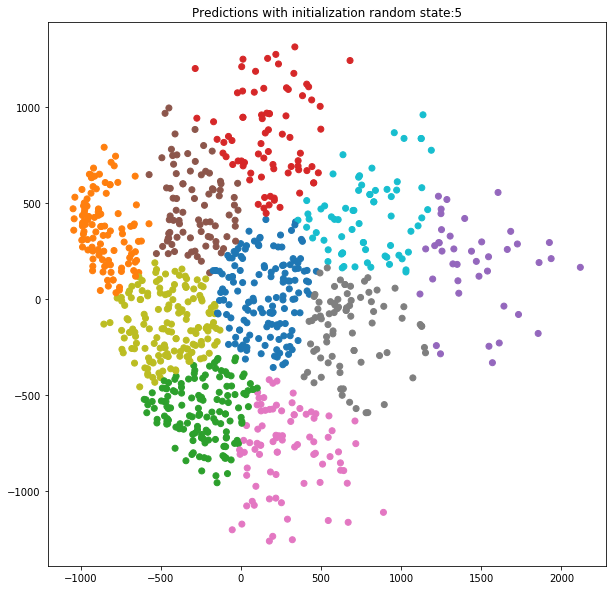

0.21288509807168984
0.33959764324355557
0.35688981645769685


/home/shashwat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


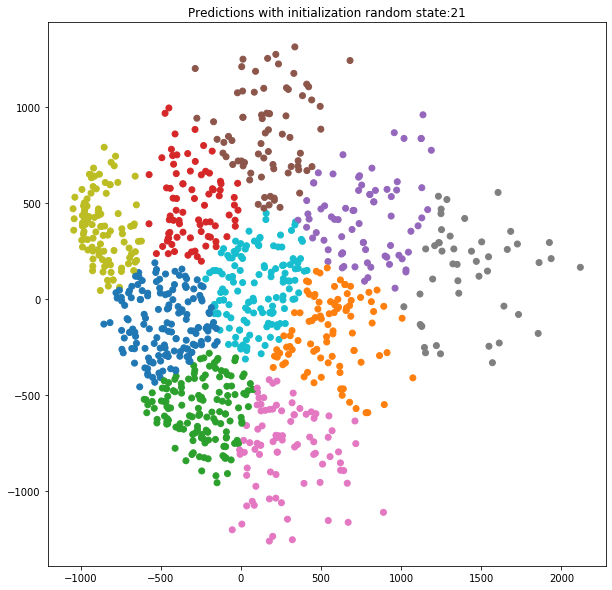

0.22416023150706077
0.353528831733968
0.36971703754607527


/home/shashwat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


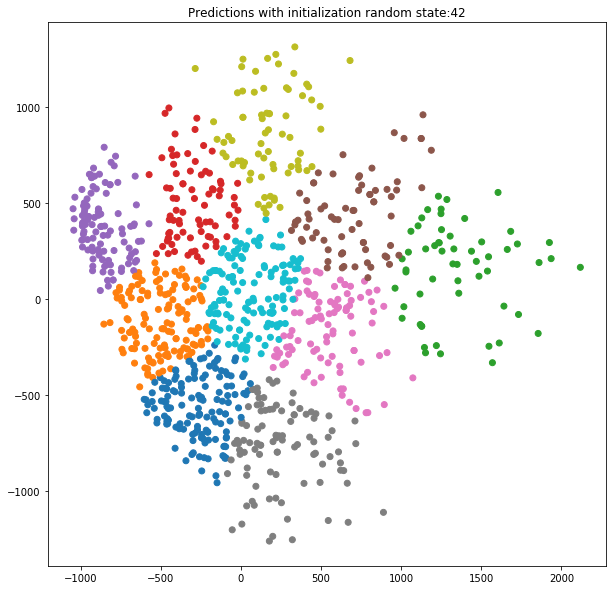

0.22836612822830524
0.35333563639120935
0.3684226376010508


/home/shashwat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [8]:
stable = []
for r in [1,3,5,21,42]:
    p = kmns(pca_data,reduced_labels,r)
    stable.append(p)
df = pd.DataFrame(stable)
df.columns=["Rand_Score","Mutual Information","V_measure"]

In [9]:
print(df)

   Rand_Score  Mutual Information  V_measure
0    0.220854            0.354272   0.369678
1    0.215342            0.342370   0.359375
2    0.212885            0.339598   0.356890
3    0.224160            0.353529   0.369717
4    0.228366            0.353336   0.368423


/home/shashwat/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


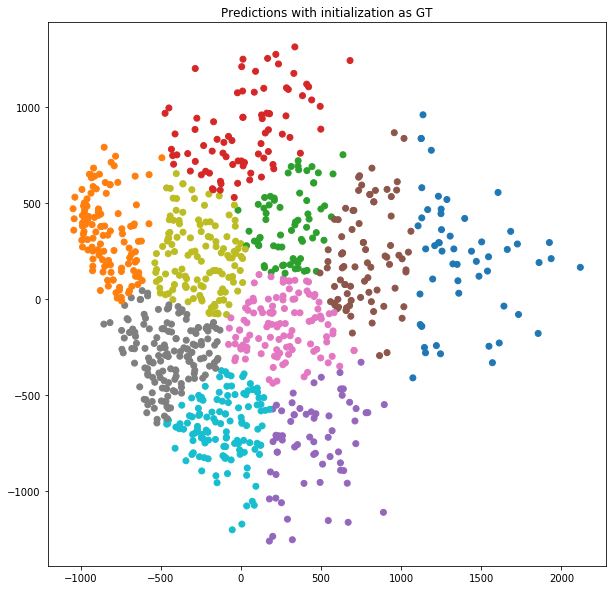

In [10]:
kmeans = KMeans(n_clusters=10,init = means).fit(pca_data)
predictions = kmeans.labels_
plt.figure(figsize=(10,10))
plt.scatter(pca_data[:,0],pca_data[:,1],c=predictions,cmap ='tab10' )
plt.title("Predictions with initialization as GT")
plt.show()